# AR(p) Parameter Estimation

The $\text{AR}(p)$ process is defined by,

$
\begin{align}
X_t = \sum_{i=1}^p \varphi_i X_{t-i} + \varepsilon_{t}
\end{align}
$

where,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

The Yule-Walker equations are relate the AR(p) parameters $\varphi_i$ to the autocorrelation function. If zero mean is</br>
assumed it follows that,

$
\begin{align}
\rho_n = \frac{\text{E}[X_t X_{t-n}]}{\text{E}[X_t^2]}
\end{align}
$

The autocorrelation functions can be shown to have the following properties,

$
\begin{align}
&\rho_0 = 1 \\
&\rho_n \leq 1 \\
&\rho_n = \rho_{-n}
\end{align}
$

Define the matrices,

$
\begin{align}
\hat{r} =
\begin{bmatrix}
\rho_1 \\
\rho_2 \\
\rho_3 \\
\vdots \\
\rho_{n-1} \\
\rho_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{\Phi} =
\begin{bmatrix}
\varphi_1 \\
\varphi_2 \\
\varphi_3 \\
\vdots \\
\varphi_{n-1} \\
\varphi_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{R} =
\begin{bmatrix}
1 & \rho_1 & \rho_2 & \cdots & \rho_{n-2} & \rho_{n-1} \\
\rho_1 & 1 & \rho_1 & \cdots & \rho_{n-3} & \rho_{n-2} \\
\rho_2 & \rho_1 & 1 & \cdots & \rho_{n-4} & \rho_{n-3} \\
\vdots & \vdots  & \vdots & \ddots & \vdots & \vdots \\
\rho_{n-2} & \rho_{n-3} & \rho_{n-4} & \cdots & 1 & \rho_1 \\
\rho_{n-1} & \rho_{n-2} & \rho_{n-3} & \cdots & \rho_1 & 1 \\
\end{bmatrix}
\end{align}
$

Then the Yule-Walker equations are given by,

$
\begin{align}
\hat{\Phi} = \hat{R}^{-1} \hat{r}
\end{align}
$

## Examples

The Yule-Walker equations for $\text{AR}(1)$ is given by,

$
\begin{align}
\varphi_1 = \rho_1
\end{align}
$

This is the OLS solution.

For $\text{AR}(2)$,

$
\begin{align}
\varphi_1 &= \frac{\rho_1 - \rho_1 \rho_2}{1 - \rho_1^2} \\
\varphi_2 &= \frac{\rho_2 - \rho_1^2}{1 - \rho_1^2}
\end{align}
$

## Stationaity

Stationarity of an $\text{AR}(p)$ leads to convergence of the moments as $t \to \infty$. Recall the shift operator, $L$, defined by,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

An $\text{AR}(p)$ process can be written as,

$
\begin{align}
\varepsilon_t = (1 - \varphi L - \varphi^2 L^2 - \varphi^3 L^3 - \cdots - \varphi^p L^p) X_t
\end{align}
$

The characteristic equation is obtained by replacing $L$ with the variable $z$ and setting the result to zero,

$
\begin{align}
1 - \varphi z - \varphi^2 z^2 - \varphi^3 z^3 - \cdots - \varphi^p z^p = 0
\end{align}
$

Stationarity requires that $\lvert z \rvert > 1$. To see this consider $\text{AR}(1)$. The characteristic equation is,

$
\begin{align}
1 - \varphi z = 0
\end{align}
$

The solution is $z = \frac{1}{\varphi}$. It follows that stationarity requires,

$
\begin{align}
\lvert \varphi \rvert < 1
\end{align}
$

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (ARIMA, Est)
from lib import (stack, fpoints, fcurve)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
nsample = 1000

def comparison(φ_vals, σ, ylim, *params):
    title = "AR(p) Comparison Plot"
    labels = [f"φ={val}" for val in φ_vals] 
    scan = ARIMA.Source.AR.create_parameter_scan(*params)
    stack(scan, ylim=ylim, title=title, labels=labels)
    return scan

## Simulations

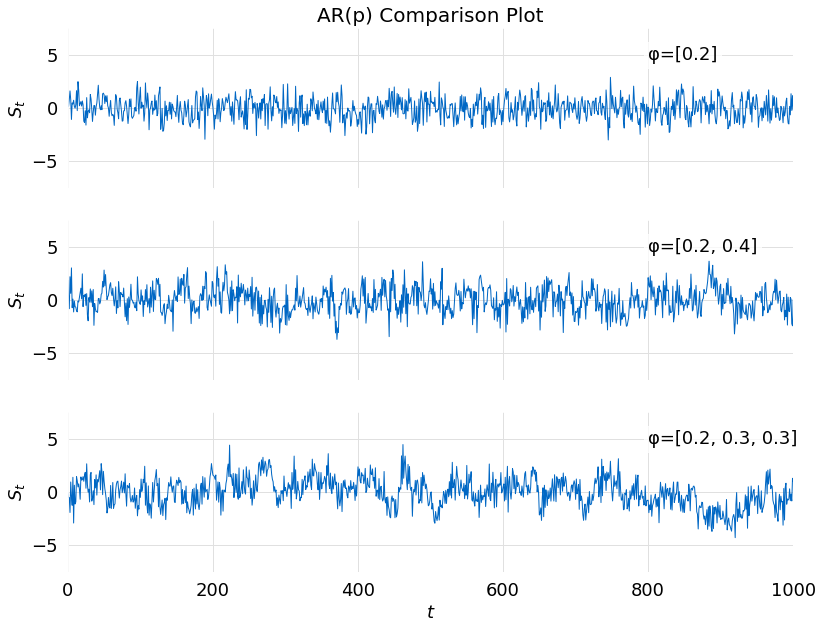

In [3]:
σ = 1.0
φ_vals = [[0.2], [0.2, 0.4], [0.2, 0.3, 0.3]]
params = [{"φ": φ, "σ": σ, "xmax": nsample} for φ in φ_vals]
ar = comparison(φ_vals, σ, [-7.5, 7.5], *params)

## Estimation of $\text{AR}(p)$ Parameters ($\sigma = 1$)

$\text{AR}(p)$ parameters are estimated using two methods. The Yule-Walker ACF and `statsmodels.tsa.arima_model.ARMA`

### AR(1) Example $\varphi = 0.2$

In [4]:
df = ARIMA.Func.PACF.apply(ar[0], nlags=1)
df.head()

,τ,ρ(τ)
1,1.0,0.209656


In [5]:
results = ARIMA.Est.AR.perform(ar[0], order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1374.780
Date:                Mon, 20 Jun 2022   AIC                           2755.560
Time:                        16:17:20   BIC                           2770.286
Sample:                             0   HQIC                          2761.156
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0373      0.038     -0.975      0.330      -0.112       0.038
ar.L1          0.2097      0.032      6.480      0.000       0.146       0.273
sigma2         0.9130      0.043     21.302      0.000       0.829       0.997
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.96   Prob(JB):                         0.54
Heteroskedasticity (H):               0.91   Skew:                            -0.02
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
ar[0].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '20/06/2022 16:17:20',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(1)-Simulation-4aeda42d-b69c-4367-bede-f4c7899e1f78',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2], 'σ': 1.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(1)': {'Estimate Type': <Est.AR: 'AR'>,
    'Model Type': <EstModel.ARMA: 'ARMA'>,
    'Const': {'Estimate': -0.03726180532024159,
     'Error': 0.03822284710272067,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.20965424347572867,
      'Error': 0.032354626227107934,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'}],
    'Sigma2': {'Estimate': 0.912

### AR(2) Example $\varphi = [0.2, 0.4]$

In [7]:
df = ARIMA.Func.PACF.apply(ar[1], nlags=2)
df.head()

,τ,ρ(τ)
1,1.0,0.170948
2,2.0,0.385860


In [8]:
results = ARIMA.Est.AR.perform(ar[1], order=2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1486.093
Date:                Mon, 20 Jun 2022   AIC                           2980.185
Time:                        16:17:20   BIC                           2999.820
Sample:                             0   HQIC                          2987.648
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0104      0.077     -0.136      0.892      -0.161       0.140
ar.L1          0.1706      0.028      6.048      0.000       0.115       0.226
ar.L2          0.3877      0.029     13.260      0.000       0.330       0.445
sigma2         1.1399      0.051     22.225      0.000       1.039       1.240
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 2.17
Prob(Q):                              0.79   Prob(JB):                         0.34
Heteroskedasticity (H):               1.04   Skew:                            -0.11
Prob(H) (two-sided):                  0.70   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
ar[1].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '20/06/2022 16:17:20',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(2)-Simulation-a9df3e06-7398-407a-9533-a4eae9574878',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.4], 'σ': 1.0},
  'Description': 'AR(2)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(2)': {'Estimate Type': <Est.AR: 'AR'>,
    'Model Type': <EstModel.ARMA: 'ARMA'>,
    'Const': {'Estimate': -0.010422630085419772,
     'Error': 0.07683759748726168,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.17063615776851393,
      'Error': 0.028211907072772057,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.3877125

### AR(3) Example $\varphi = [0.2, 0.3, 0.3]$

In [10]:
df = ARIMA.Func.PACF.apply(ar[2], nlags=3)
df.head()

,τ,ρ(τ)
1,1.0,0.187227
2,2.0,0.320973
3,3.0,0.298969


In [11]:
results = ARIMA.Est.AR.perform(ar[2], order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1419.933
Date:                Mon, 20 Jun 2022   AIC                           2849.865
Time:                        16:17:20   BIC                           2874.409
Sample:                             0   HQIC                          2859.193
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0155      0.164     -0.095      0.925      -0.336       0.305
ar.L1          0.1865      0.030      6.173      0.000       0.127       0.246
ar.L2          0.3211      0.027     11.684      0.000       0.267       0.375
ar.L3          0.2986      0.031      9.791      0.000       0.239       0.358
sigma2         0.9982      0.048     20.913      0.000       0.905       1.092
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 4.21
Prob(Q):                              0.83   Prob(JB):                         0.12
Heteroskedasticity (H):               0.94   Skew:                             0.11
Prob(H) (two-sided):                  0.60   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
ar[2].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '20/06/2022 16:17:20',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(3)-Simulation-9e59691b-e8aa-4146-bd6b-43d3a9176479',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.3, 0.3], 'σ': 1.0},
  'Description': 'AR(3)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(3)': {'Estimate Type': <Est.AR: 'AR'>,
    'Model Type': <EstModel.ARMA: 'ARMA'>,
    'Const': {'Estimate': -0.015497151076050422,
     'Error': 0.16358036389309805,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.18654702099833015,
      'Error': 0.030219436693000045,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.32

## Simulations $\sigma = 5.0$

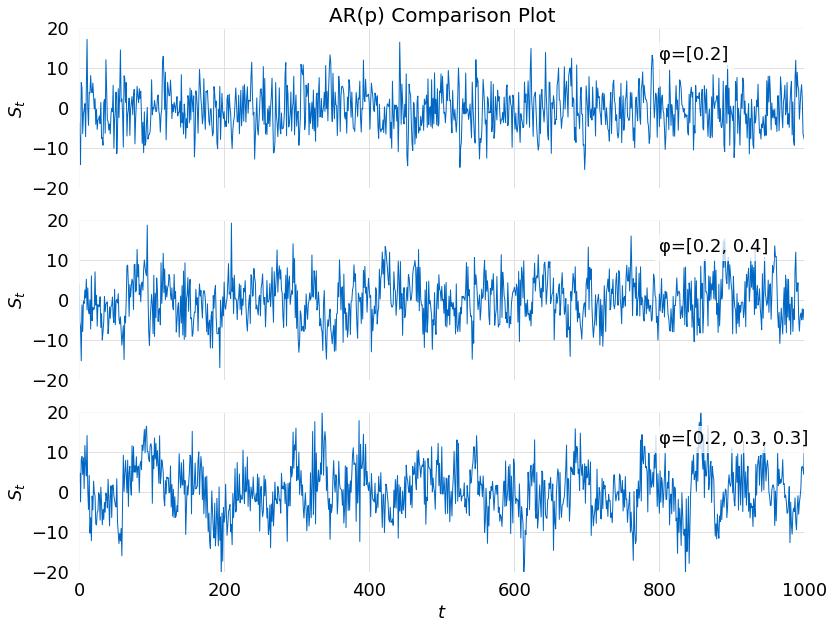

In [13]:
σ = 5.0
φ_vals = [[0.2], [0.2, 0.4], [0.2, 0.3, 0.3]]
params = [{"φ": φ, "σ": σ, "xmax": nsample} for φ in φ_vals]
ar = comparison(φ_vals, σ, [-20.0, 20.0], *params)

### AR(1) Example ($\varphi = 0.2$)

In [14]:
df = ARIMA.Func.PACF.apply(ar[0], nlags=1)
df.head()

,τ,ρ(τ)
1,1.0,0.230292


In [15]:
results = ARIMA.Est.AR.perform(ar[0], order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3046.311
Date:                Mon, 20 Jun 2022   AIC                           6098.622
Time:                        16:17:20   BIC                           6113.348
Sample:                             0   HQIC                          6104.218
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2706      0.209     -1.293      0.196      -0.681       0.140
ar.L1          0.2307      0.029      8.036      0.000       0.174       0.287
sigma2        25.7540      1.188     21.677      0.000      23.425      28.083
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.93
Prob(Q):                              0.93   Prob(JB):                         0.23
Heteroskedasticity (H):               0.96   Skew:                             0.12
Prob(H) (two-sided):                  0.71   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
ar[0].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '20/06/2022 16:17:20',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(1)-Simulation-ff609d75-af77-4edc-879a-6403cdcf13ce',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2], 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(1)': {'Estimate Type': <Est.AR: 'AR'>,
    'Model Type': <EstModel.ARMA: 'ARMA'>,
    'Const': {'Estimate': -0.2706491072904232,
     'Error': 0.20934572074714786,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.23068142311510648,
      'Error': 0.028705196441105807,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'}],
    'Sigma2': {'Estimate': 25.753

### AR(2) Example ($\varphi = [0.2, 0.4]$)

In [17]:
df = ARIMA.Func.PACF.apply(ar[1], nlags=2)
df.head()

,τ,ρ(τ)
1,1.0,0.211327
2,2.0,0.351861


In [18]:
results = ARIMA.Est.AR.perform(ar[1], order=2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -3008.546
Date:                Mon, 20 Jun 2022   AIC                           6025.091
Time:                        16:17:20   BIC                           6044.726
Sample:                             0   HQIC                          6032.554
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.354      0.053      0.958      -0.675       0.712
ar.L1          0.2109      0.030      7.025      0.000       0.152       0.270
ar.L2          0.3519      0.029     12.026      0.000       0.295       0.409
sigma2        23.8720      1.070     22.305      0.000      21.774      25.970
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.86
Prob(Q):                              0.96   Prob(JB):                         0.40
Heteroskedasticity (H):               1.03   Skew:                             0.11
Prob(H) (two-sided):                  0.79   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
ar[1].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '20/06/2022 16:17:20',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(2)-Simulation-e4d8aa42-d411-47ea-bd36-ed0fb9054e3c',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.4], 'σ': 5.0},
  'Description': 'AR(2)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(2)': {'Estimate Type': <Est.AR: 'AR'>,
    'Model Type': <EstModel.ARMA: 'ARMA'>,
    'Const': {'Estimate': 0.01881797657170161,
     'Error': 0.3537970141153436,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.21086152542109277,
      'Error': 0.03001708614735983,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.35185532745

### AR(3) Example ($\varphi = [0.2, 0.3, 0.3]$)

In [20]:
df = ARIMA.Func.PACF.apply(ar[2], nlags=3)
df.head()

,τ,ρ(τ)
1,1.0,0.161082
2,2.0,0.288442
3,3.0,0.301882


In [21]:
results = ARIMA.Est.AR.perform(ar[2], order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -3061.886
Date:                Mon, 20 Jun 2022   AIC                           6133.772
Time:                        16:17:21   BIC                           6158.315
Sample:                             0   HQIC                          6143.100
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4825      0.663      0.728      0.467      -0.816       1.781
ar.L1          0.1610      0.029      5.584      0.000       0.104       0.218
ar.L2          0.2897      0.028     10.303      0.000       0.235       0.345
ar.L3          0.3034      0.030     10.251      0.000       0.245       0.361
sigma2        26.5478      1.156     22.975      0.000      24.283      28.813
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 0.55
Prob(Q):                              0.76   Prob(JB):                         0.76
Heteroskedasticity (H):               0.99   Skew:                            -0.01
Prob(H) (two-sided):                  0.95   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
ar[2].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '20/06/2022 16:17:20',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(3)-Simulation-64afe47d-b16d-4e68-b488-81a96fdb1fcb',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.3, 0.3], 'σ': 5.0},
  'Description': 'AR(3)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(3)': {'Estimate Type': <Est.AR: 'AR'>,
    'Model Type': <EstModel.ARMA: 'ARMA'>,
    'Const': {'Estimate': 0.48245971756688394,
     'Error': 0.6627256491526959,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.16101168477991956,
      'Error': 0.02883486072596861,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.289698